In [6]:
import sklearn.feature_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectPercentile, chi2,RFE,f_classif, mutual_info_classif
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
import time
from func_timeout import FunctionTimedOut, func_timeout
from sklearn.utils import resample
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import *
import statistics

# Import data

In [7]:

data = pd.read_csv('LICD.csv', sep=';')
new_columns = (data.columns.drop(['Industry Main Area Code','Fiscal accounting type','Currency code','NonCompliance','Checklist Content']).tolist())
data = data[new_columns]
data=data.fillna(0)
cnt=0
cols_to_order = []
for i in data.columns:
    d=pd.unique(data[i])
    if len(d)<11:
        cols_to_order.append(i)
        cnt+=1
print(cnt)    

new_columns = (data.columns.drop(cols_to_order).tolist())
data = data[new_columns]
data['Industry Code']=pd.Categorical(data['Industry Code'])
#Ditch excessive columns

#reorder y column as last
cols_to_order = ['Checklist ID']
new_columns =  (data.columns.drop(cols_to_order).tolist())+cols_to_order 
data = data[new_columns]
print(data.iloc[:,-1])

dataset=data#.to_numpy()

263
0        0xF7546946548F1D8AAFFF7755B203351826F8828F4408...
1        0x6516E25BEE5CA3194CD7C6120B4A0BBD31142E5F22D8...
2        0x6516E25BEE5CA3194CD7C6120B4A0BBD31142E5F22D8...
3        0x6516E25BEE5CA3194CD7C6120B4A0BBD31142E5F22D8...
4        0x0D71DD5F8347F2F1B937790CE366D5F840AFF85EE9BF...
                               ...                        
63629    0x2B5273610C789FA8C90D6BDD63AC0896EA95902A1D5D...
63630    0x2B5273610C789FA8C90D6BDD63AC0896EA95902A1D5D...
63631    0x2B5273610C789FA8C90D6BDD63AC0896EA95902A1D5D...
63632    0x65398CDFB4B007E6D5BB42C40E2D931B0CA82F03C59E...
63633    0x9BA86DB24A7761B5A88614F56549157A539F6524B4CA...
Name: Checklist ID, Length: 63634, dtype: object


# Hyperparameter tuning

In [12]:
#HPT for AdaBoost
y=data["Checklist ID"]
x=pd.get_dummies(data.iloc[:, :-1])
x = SelectPercentile(mutual_info_classif, percentile=50).fit_transform(x, y)
mlp_gs = AdaBoostClassifier()
parameter_space = {
        'n_estimators': [10,20,50,100],
        'learning_rate': [0.1,0.5,1.0,1.5]
    }
start_time = time.time()
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=2, cv=4)
print(clf)

clf.fit(x,y)
traintime=(time.time()-start_time)
print("Training time: "+ str(traintime))
print(clf.best_params_)
print(clf.best_estimator_)
fh2=open("Log_" + "AdaboostChecklistBestParametersmutualinfo50percent"+ '.txt', 'w+')
fh2.write("Training time: "+ str(traintime))
fh2.write("Best parameters:"+ str(clf.best_params_))
fh2.write("Best estimator:"+ str(clf.best_estimator_))
fh2.close()

GridSearchCV(cv=4, estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [10, 20, 50, 100]})
Training time: 2605.1080543994904
{'learning_rate': 0.5, 'n_estimators': 50}
AdaBoostClassifier(learning_rate=0.5)


In [13]:
#HPT for kNN
y=data["Checklist ID"]
x=pd.get_dummies(data.iloc[:, :-1])
x = SelectPercentile(mutual_info_classif, percentile=50).fit_transform(x, y)
mlp_gs = KNeighborsClassifier()
parameter_space = {
        'n_neighbors': [1,5,10,20,50,100,200,500,1000],
        'weights': ['uniform','distance']
    }
start_time = time.time()
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=8, cv=4)
print(clf)
    #clf.fit(X, y)
clf.fit(x,y)
traintime=(time.time()-start_time)
print("Training time: "+ str(traintime))
print(clf.best_params_)
print(clf.best_estimator_)
fh2=open("Log_" + "KNNChecklistBestParametersMutualInfo50percent"+ '.txt', 'w+')
fh2.write("Training time: "+ str(traintime))
fh2.write("Best parameters:"+ str(clf.best_params_))
fh2.write("Best estimator:"+ str(clf.best_estimator_))
fh2.close()

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50, 100, 200, 500, 1000],
                         'weights': ['uniform', 'distance']})
Training time: 337.20228338241577
{'n_neighbors': 100, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=100, weights='distance')


In [14]:
#HPT for GradientBoost
y=data["Checklist ID"]
x=pd.get_dummies(data.iloc[:, :-1])
x = SelectPercentile(mutual_info_classif, percentile=50).fit_transform(x, y)
mlp_gs = GradientBoostingClassifier()
parameter_space = {
        'n_estimators': [10,20,50,100],
        'learning_rate': [0.1,0.5,1.0,1.5]
    }
start_time = time.time()
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=8, cv=4)
print(clf)
    #clf.fit(X, y)
clf.fit(x,y)
traintime=(time.time()-start_time)
print("Training time: "+ str(traintime))
print(clf.best_params_)
print(clf.best_estimator_)
fh2=open("Log_" + "GradBoostChecklistBestParametersMutualInfo50percent"+ '.txt', 'w+')
fh2.write("Training time: "+ str(traintime))
fh2.write("Best parameters:"+ str(clf.best_params_))
fh2.write("Best estimator:"+ str(clf.best_estimator_))
fh2.close()

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=8,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [10, 20, 50, 100]})
Training time: 280144.87755203247
{'learning_rate': 0.1, 'n_estimators': 20}
GradientBoostingClassifier(n_estimators=20)


In [15]:
#HPT for MLP
y=data["Checklist ID"]
x=pd.get_dummies(data.iloc[:, :-1])
x = SelectPercentile(mutual_info_classif, percentile=50).fit_transform(x, y)
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
        'hidden_layer_sizes': [(10,),(20,),(50,),(100,),(200,)],
        'activation': ['relu','logistic'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive']
    }
start_time = time.time()
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=2, cv=4)
print(clf)
    #clf.fit(X, y)
clf.fit(x,y)
traintime=(time.time()-start_time)
print("Training time: "+ str(traintime))
print(clf.best_params_)
print(clf.best_estimator_)
fh2=open("Log_" + "MLPChecklistBestParametersMutualInfo50percent"+ '.txt', 'w+')
fh2.write("Training time: "+ str(traintime))
fh2.write("Best parameters:"+ str(clf.best_params_))
fh2.write("Best estimator:"+ str(clf.best_estimator_))
fh2.close()

GridSearchCV(cv=4, estimator=MLPClassifier(max_iter=100), n_jobs=2,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10,), (20,), (50,), (100,)],
                         'learning_rate': ['constant', 'adaptive']})
Training time: 5315.801725149155
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
MLPClassifier(activation='logistic', max_iter=100)


# Checklist experiment, with feature selection and hyper parameter tuned ML methods

In [3]:

def sequentialselector(model,i,X,y):
    return SequentialFeatureSelector(estimator= model,
                                  n_features_to_select=i).fit_transform(X,y)
def rfe(model,i,X,y):
    return RFE(estimator= model,n_features_to_select=i,step=20).fit_transform(X,y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X=pd.get_dummies(X)
X=X.clip(lower=0)
X=X.to_numpy()
y=y.to_numpy()

X_new=0
#Iterate through all ML methods in the experiment
for j in  [MLPClassifier(alpha= 0.0001,activation='logistic', hidden_layer_sizes=(100,),
              learning_rate='constant', max_iter=100),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=50, weights='distance'),AdaBoostClassifier(learning_rate=0.5, n_estimators=50),GradientBoostingClassifier(learning_rate=0.1,n_estimators=20)]:
    timetotal1=0
    xscore_chi_bal_acc=0
    xscore_chi_bal_acc_std=0
    xscore_chi_acc=0
    xscore_chi_acc_std=0
    xscore_chi_prec=0
    xscore_chi_prec_std=0
    xscore_chi_rec=0
    xscore_chi_rec_std=0
    xscore_chi_roc_auc=0
    xscore_chi_roc_auc_std=0
    xscore_f_bal_acc=0
    xscore_f_bal_acc_std=0
    xscore_f_acc=0
    xscore_f_acc_std=0
    xscore_f_prec=0
    xscore_f_prec_std=0
    xscore_f_rec=0
    xscore_f_rec_std=0
    xscore_f_roc_auc=0
    xscore_f_roc_auc_std=0
    timetotal2=0
    xscore2=0
    #Iterate through all feature selection set sizes.
    for i in [0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5]:
        model=j
        #Perform feature selection (Mutual info)
        X_new = SelectPercentile(mutual_info_classif, percentile=i*100).fit_transform(X, y)
        start_time1=time.time()
        n_inputs, n_outputs = X_new.shape[1], y.shape[0]
        #Perform randomized KFold splits for crossvalidation
        cv = KFold(n_splits=5)
        acc=list()
        prec=list()
        rec=list()
        balacc=list()
        #Iterate through all random splits
        for train_ix, test_ix in cv.split(X_new):
            # prepare data
            X_train, X_test = X_new[train_ix], X_new[test_ix]
            y_train, y_test = y[train_ix], y[test_ix]
            # fit model
            model.fit(X_train, y_train)
            # make a prediction on the test set and calulate scores (statistics)
            yhat = model.predict(X_test)
            balacc.append(balanced_accuracy_score(y_test, yhat))
            acc.append(accuracy_score(y_test, yhat))
            prec.append(precision_score(y_test, yhat,average='macro'))
            rec.append(recall_score(y_test, yhat,average='macro'))
            #auc=auc.append(roc_auc_score(y_test, yhat,average='macro'))
        xscore_chi_bal_acc_std+=statistics.stdev(balacc)
        xscore_chi_bal_acc+=mean(balacc)
        xscore_chi_acc+=mean(acc)
        xscore_chi_acc_std+=statistics.stdev(acc)
        xscore_chi_prec+=mean(prec)
        xscore_chi_prec_std+=statistics.stdev(prec)
        xscore_chi_rec+=mean(rec)
        xscore_chi_rec_std+=statistics.stdev(rec)
        
        #Perform feature selection (Anova F)
        timetotal1+=(time.time()-start_time1)
        X_new = SelectPercentile(f_classif, percentile=i*100).fit_transform(X, y)
        n_inputs, n_outputs = X_new.shape[1], y.shape[0]
        start_time2=time.time()
        #Perform randomized KFold splits for crossvalidation
        cv = KFold(n_splits=5)
        acc=list()
        prec=list()
        rec=list()
        balacc=list()
        #Iterate through all random splits
        for train_ix, test_ix in cv.split(X_new):
            # prepare data
            X_train, X_test = X_new[train_ix], X_new[test_ix]
            y_train, y_test = y[train_ix], y[test_ix]
            # fit model
            model.fit(X_train, y_train)
            # make a prediction on the test set
            yhat = model.predict(X_test)
            # calulate scores (statistics)
            balacc.append(balanced_accuracy_score(y_test, yhat))
            acc.append(accuracy_score(y_test, yhat))
            prec.append(precision_score(y_test, yhat,average='macro'))
            rec.append(recall_score(y_test, yhat,average='macro'))
            #auc=auc.append(roc_auc_score(y_test, yhat))
        xscore_f_bal_acc_std+=statistics.stdev(balacc)
        xscore_f_bal_acc+=mean(balacc)
        xscore_f_acc+=mean(acc)
        xscore_f_acc_std+=statistics.stdev(acc)
        xscore_f_prec+=mean(prec)
        xscore_f_prec_std+=statistics.stdev(prec)
        xscore_f_rec+=mean(rec)
        xscore_f_rec_std+=statistics.stdev(rec)
        timetotal2+=(time.time()-start_time2)
    #Calculate average scores over all feature selection sets.
    print(str(j)+"Avg time: "+str((timetotal1+timetotal2)/16))
    print(str(j)+" chi2 bal. acc: "+str(xscore_chi_bal_acc/8)+"+-"+str(xscore_chi_bal_acc_std/8)+" acc: "+str(xscore_chi_acc/8)+"+-"+str(xscore_chi_acc_std/8)+" prec: "+str(xscore_chi_prec/8)+"+-"+str(xscore_chi_prec_std/8)+" rec: "+str(xscore_chi_rec/8)+"+-"+str(xscore_chi_rec_std/8))
    print(str(j)+" Anova F bal. acc: "+str(xscore_f_bal_acc/8)+"+-"+str(xscore_f_bal_acc_std/8)+" acc: "+str(xscore_f_acc/8)+"+-"+str(xscore_f_acc_std/8)+" prec: "+str(xscore_f_prec/8)+"+-"+str(xscore_f_prec_std/8)+" rec: "+str(xscore_f_rec/8)+"+-"+str(xscore_f_rec_std/8))
   

MLPClassifier(activation='logistic', max_iter=100)Avg time: 292.6943158954382
MLPClassifier(activation='logistic', max_iter=100) chi2 bal. acc: 0.012810084246968827+-0.005100229566597229 acc: 0.037643022389657166+-0.020663768894320773 prec: 0.014167485780381095+-0.00510789586572722 rec: 0.011936164531555635+-0.004927054909995371
MLPClassifier(activation='logistic', max_iter=100) Anova F bal. acc: 0.022832204667917654+-0.006185144727702544 acc: 0.050236709527231284+-0.019369178741615877 prec: 0.02270347023951789+-0.006678179773933108 rec: 0.021147008077084153+-0.005931898155596287
LogisticRegression()Avg time: 387.0655936896801
LogisticRegression() chi2 bal. acc: 0.005095453574152375+-0.001264176334315421 acc: 0.02074546045788675+-0.011220179050854292 prec: 0.0009370628966623302+-0.0007165097603153872 rec: 0.005031418542934372+-0.001252856168681371
LogisticRegression() Anova F bal. acc: 0.011672103811474953+-0.0028998346829106963 acc: 0.03255152963129379+-0.014866164324000782 prec: 0.00

# Top Features

In [ ]:

dataset=data.to_numpy()
X = (pd.get_dummies(data.iloc[:, :-1])).to_numpy()
y = dataset[:, -1]
X_new = SelectPercentile(f_classif, percentile=0.1*100)

trainprep=data.drop("Checklist ID", axis=1)
train_dataframe = (pd.get_dummies(trainprep))
#print(X)
x_features = X_new.fit_transform(X, y)
columns = np.asarray(train_dataframe.columns.values)
support = np.asarray(X_new.get_support())
columns_with_support = columns[support]

print("Mutual info top 10% selected features")
print(columns_with_support)
X_new = SelectPercentile(mutual_info_classif, percentile=0.1*100)

trainprep=data.drop("Checklist ID", axis=1)
train_dataframe = (pd.get_dummies(trainprep))
x_features = X_new.fit_transform(X, y)
columns = np.asarray(train_dataframe.columns.values)
support = np.asarray(X_new.get_support())
columns_with_support = columns[support]
print("Anova F top 10% selected features")
print(columns_with_support)

# Histogram of predicted checklists for DT 10% of the features

highest number of observations for true positives                  Count
Checklist number       
200                 139
177                 129
254                 100
355                  71
233                  68
highest number of observations for ground truths                  Count
Checklist number       
200                 489
355                 374
254                 356
233                 349
109                 330
highest number of observations for predictions                  Count
Checklist number       
200                 513
254                 405
233                 388
355                 353
9                   351


(0.0, 370.0)

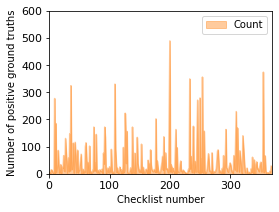

In [10]:
#Decisiontrees comes with built-in feature selection and is not very suitable to compare performance of different feature set sizes.
#
from sklearn.model_selection import train_test_split
y=data["Checklist ID"].astype('category').cat.codes
x=pd.get_dummies(data.iloc[:, :-1])
x = SelectPercentile(f_classif, percentile=10).fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model= DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

df = pd.DataFrame({'Checklist number': predictions[predictions==y_test], 'Count': y_test[predictions==y_test]})
group=df.groupby(by=["Checklist number"]).count()
highest=group.sort_values(by=['Count'], ascending=False)
print("highest number of observations for true positives"+str(highest.head(5)))

df2 = pd.DataFrame({'Checklist number': y_test, 'Count': y_test})
group2=df2.groupby(by=["Checklist number"]).count()
highest=group2.sort_values(by=['Count'], ascending=False)
print("highest number of observations for ground truths"+str(highest.head(5)))

df3 = pd.DataFrame({'Checklist number': predictions, 'Count': y_test})
group3=df3.groupby(by=["Checklist number"]).count()
highest=group3.sort_values(by=['Count'], ascending=False)
print("highest number of observations for predictions"+str(highest.head(5)))


ax2=group3.plot(y={'Count'},kind='area',xlim={0,370},ylim={0,600},stacked=False,fontsize=11,figsize=(4,3),ylabel="Number of predictions")
ax2.set_ylim(bottom=0)
ax2.set_xlim(left=0)

mycolors = [(0.063,0.239,0.353)]
ax0=group.plot(y={'Count'},kind='area',xlim={0,370},ylim={0,600},stacked=False,fontsize=11,figsize=(4,3),ylabel="Number of true positives",color=mycolors)
ax0.set_ylim(bottom=0)
ax0.set_xlim(left=0)


mycolors = [(1,0.596,0.235)]
ax1=group2.plot(y={'Count'},kind='area',xlim={0,370},ylim={0,600},stacked=False,fontsize=11,figsize=(4,3),ylabel="Number of positive ground truths",color=mycolors)
ax1.set_ylim(bottom=0)
ax1.set_xlim(left=0)



# Histogram of predicted checklists for KNN 10% of the features

highest number of observations for true positives                  Count
Checklist number       
200                 101
177                  90
47                   49
9                    47
254                  47
highest number of observations for ground truths                  Count
Checklist number       
200                 489
355                 374
254                 356
233                 349
109                 330
highest number of observations for predictions                  Count
Checklist number       
9                   940
36                  651
200                 541
11                  496
109                 397


(0.0, 370.0)

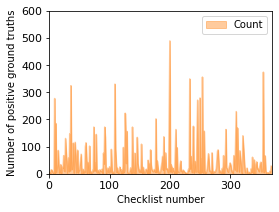

In [9]:

from sklearn.model_selection import train_test_split
y=data["Checklist ID"].astype('category').cat.codes
x=pd.get_dummies(data.iloc[:, :-1])
x = SelectPercentile(mutual_info_classif, percentile=10).fit_transform(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model= KNeighborsClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

df = pd.DataFrame({'Checklist number': predictions[predictions==y_test], 'Count': y_test[predictions==y_test]})
group=df.groupby(by=["Checklist number"]).count()
highest=group.sort_values(by=['Count'], ascending=False)
print("highest number of observations for true positives"+str(highest.head(5)))

df2 = pd.DataFrame({'Checklist number': y_test, 'Count': y_test})
group2=df2.groupby(by=["Checklist number"]).count()
highest=group2.sort_values(by=['Count'], ascending=False)
print("highest number of observations for ground truths"+str(highest.head(5)))

df3 = pd.DataFrame({'Checklist number': predictions, 'Count': y_test})
group3=df3.groupby(by=["Checklist number"]).count()
highest=group3.sort_values(by=['Count'], ascending=False)
print("highest number of observations for predictions"+str(highest.head(5)))


ax0=group.plot(y={'Count'},kind='area',xlim={0,370},ylim={0,600},stacked=False,fontsize=11,figsize=(4,3),ylabel="Number of true positives")
ax0.set_ylim(bottom=0)
ax0.set_xlim(left=0)

mycolors = [(0.063,0.239,0.353)]
ax2=group3.plot(y={'Count'},kind='area',xlim={0,370},ylim={0,1000},stacked=False,fontsize=11,figsize=(4,3),ylabel="Number of predictions",color=mycolors)
ax2.set_ylim(bottom=0)
ax2.set_xlim(left=0)


mycolors = [(1,0.596,0.235)]
ax1=group2.plot(y={'Count'},kind='area',xlim={0,370},ylim={0,600},stacked=False,fontsize=11,figsize=(4,3),ylabel="Number of positive ground truths",color=mycolors)
ax1.set_ylim(bottom=0)
ax1.set_xlim(left=0)